<a href="https://colab.research.google.com/github/Sugarcane-svg/R/blob/main/Data602/midterm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm 602


* In this  assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 

* You must use Pandas as the **primary tool** to process your data.

* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  
 * https://www.youtube.com/watch?v=inN8seMm7UI (Getting started with Colab).

* Your data should need some "work", or be considered "dirty".  You must show your skills in data cleaning/wrangling.

### Data examples:
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### Resources:

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


### Headings or comments
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.




# Research Question

In this section, please state the question you are trying to solve.  As mentioned, this assignment is opened-ended, so you are free to choose a research question, and corrosponding data sources, of your choosing.

Due to covid-19, more and more works are moving into remote condition. People are now can work from home instead of going to physical office. Therefore, they save time in driving. Moreover, there are the shortage of car, assume that the population of purchasing cars is reduce, the car crash should decrease

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [40]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# get the data set
collision = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Crashes.csv")



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
# copy of original data
df = pd.DataFrame(collision)

I already briefly taken a look of the dataset, there are more than 10 columns and over 1 million rows. However, I am still going to show some information just so everyone have some idea of what it is.

In [131]:
# number of columns
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')

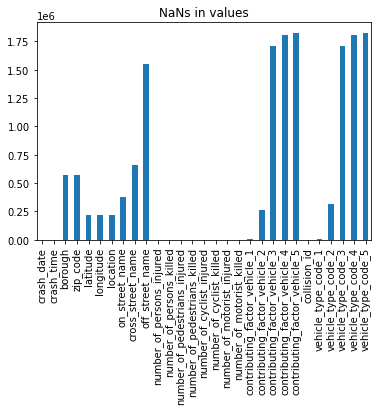

In [132]:
# number of rows
len(df)


# distribution of missing values
df.isna().sum().plot(kind = 'bar', title = 'NaNs in values', x = 'values', y = 'counts')
plt.show()

as we can see from the plot, the missing values in 'off_street_name', 'cross_street_name', 'contributing_factor_vehicle_2' to 'contributing_factor_vehicle_5', 'vehicle_type_code_2' to 'vehicle_type_code_5' have relatively high missing values. and we don't really care about the exact time collision happen, and the collision ID. Logitude, latitude and location seem a bit tedious. Therefore, I am going to drop all these columns to make the data narrower.

In [133]:
# dropping unnesessary columns
df.drop(['off_street_name',
               'cross_street_name',
               'contributing_factor_vehicle_2',
               'contributing_factor_vehicle_3',
               'contributing_factor_vehicle_4',
               'contributing_factor_vehicle_5',
               'vehicle_type_code_2',
               'vehicle_type_code_3',
               'vehicle_type_code_4',
               'vehicle_type_code_5',
               'crash_time',
               'collision_id',
               'longitude',
               'latitude',
         'zip_code'], axis = 1, inplace = True)


In [134]:
df.isna().sum().sort_values(ascending = False)

borough                          566450
on_street_name                   374661
location                         217763
vehicle_type_code_1               10036
contributing_factor_vehicle_1      5276
number_of_persons_killed             31
number_of_persons_injured            18
number_of_motorist_killed             0
number_of_motorist_injured            0
number_of_cyclist_killed              0
number_of_cyclist_injured             0
number_of_pedestrians_killed          0
number_of_pedestrians_injured         0
crash_date                            0
dtype: int64

So we see that the missing values in columns  from 'number_of_pedestrian_injured' to 'number_of_motorist_killed' have no missing values, so we leave them as the way they are. column 'contributing_factor_vehicle_1' and 'vehicle_type_code1' only has a tiny amount of missing value compare to the whole, I will leave it alone because it doesn't seem to affect the analysis later. The major problem is that the top three value has lots of missing value, so we need to deal with them with extra care.
*********



### How is NaNs distributed over recorded years?

In [135]:
# extract year from column 'crash_date'
df['crash_date'] = pd.to_datetime(df['crash_date'], infer_datetime_format=True)
df['crash_date'] = df['crash_date'].dt.year

In [136]:
df['crash_date'].value_counts().sort_index(ascending = False)

2021     89644
2020    112891
2019    211482
2018    231563
2017    231008
2016    229831
2015    217694
2014    206033
2013    203734
2012    100546
Name: crash_date, dtype: int64

In [1]:
temp = df.groupby('crash_date')['borough'].value_counts(dropna = False)
plt.plot(df['crash_date'], temp)

NameError: ignored

In [141]:
pd.isnull(df.groupby(df['crash_date'])['borough'])

False

we see that in [which] year, the missing value there are more missing values than others 

In [ ]:
# mean, median, quartiles
collision.describe

<bound method NDFrame.describe of                   crash_date crash_time  ... vehicle_type_code_4  vehicle_type_code_5
0    2021-04-14T00:00:00.000       5:32  ...                 NaN                  NaN
1    2021-04-13T00:00:00.000      21:35  ...                 NaN                  NaN
2    2021-04-15T00:00:00.000      16:15  ...                 NaN                  NaN
3    2021-04-13T00:00:00.000      16:00  ...                 NaN                  NaN
4    2021-04-12T00:00:00.000       8:25  ...                 NaN                  NaN
..                       ...        ...  ...                 ...                  ...
995  2021-04-17T00:00:00.000      18:59  ...                 NaN                  NaN
996  2021-04-17T00:00:00.000      14:10  ...                 NaN                  NaN
997  2021-04-06T00:00:00.000       8:23  ...                 NaN                  NaN
998  2021-04-17T00:00:00.000       0:55  ...                 NaN                  NaN
999  2021-04-13T00:0

# Data Wrangling
Create a subset of your original data and perform the following.  

1. Modify multiple column names.

2. Fix any missing and invalid values in the data set.

3. Create new columns based on existing columns or calculations.

4. Drop column(s) from your dataset.

5. Drop a row(s) from your dataset.

6. Sort your data based on multiple variables. 

7. Filter your data based on some condition. 

8. Convert all the string values to upper or lower cases in one column.

9. Check whether numeric values are present in a given column of your dataframe.

10. Group your dataset by one column, and get the mean, min, and max values by group. 
  * Groupby()
  * agg() or .apply()

**You are free (and should) to add on to these questions.  Please clearly indicate in your assignment your answers to these questions.**

As far we see that there are so many columns, and we are not focus on some of them, so I am going to reduce some columns such as 'CRASH TIME', 'ZIP CODE',  'LATITUDE', 'LONGITUDE', 'LOCATION', 'CROSS STREET NAME', 'OFF STREET NAME'. The data list one to five contributing factors vehicle, but we only considered the one which cause the collision, therefore, I am going to drop columns 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', also with 'COLLISION_ID', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'

In [ ]:
collision.drop(['crash_time',
                'zip_code',
                'latitude',
                'longitude',
                'location',
                'cross_street_name',
                'off_street_name',
                'contributing_factor_vehicle_2',
                'contributing_factor_vehicle_3',
                'contributing_factor_vehicle_4',
                'contributing_factor_vehicle_5',
                'collision_id',
                'vehicle_type_code2',
                'vehicle_type_code_3',
                'vehicle_type_code_4',
                'vehicle_type_code_5'], axis = 1, inplace = True)

Then we are going to double check if there are still some missing values

In [ ]:
# missing values in sub_df
collision.isna().sum()

crash_date                         0
borough                          367
on_street_name                   243
number_of_persons_injured          0
number_of_persons_killed           0
number_of_pedestrians_injured      0
number_of_pedestrians_killed       0
number_of_cyclist_injured          0
number_of_cyclist_killed           0
number_of_motorist_injured         0
number_of_motorist_killed          0
contributing_factor_vehicle_1      1
vehicle_type_code1                 7
dtype: int64

## Data Visualization
Create a data visualization of your choosing on your dataset.  You may use Pandas or other libraries to complete your visualization (plotly, plotly express, seaborn, etc.)

You must include, at the minimum three different plots and explain what these plots do.  Please do not just include a plot without a description.





# Conclusions 
Provide some conclusions or insight gained from looking at your data.
